In [1]:
#Importing all the libraries 


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv file

df = pd.read_csv('/Users/giacomoflores/Desktop/DSIA/Deloitte/DLT_AI_and_DATA_CUSTOMER_BASE_EN.csv', sep=';')

In [3]:
#Dropping from the dataset all the clients without the privacy consent, leaving or at risk of leaving.

df1 = df[df.CONSENSUS_PRIVACY == 'YES']
df1 = df1[df1.CLC_STATUS != '4-Risk churn']
df1 = df1[df1.CLC_STATUS != '5-Leaving']

In [4]:
#Splitting the labeled dataset into train and test

df1u = pd.read_csv('/Users/giacomoflores/Desktop/DSIA/Deloitte/df1.csv', sep=';')
df1u = df1u.drop(['Unnamed: 0'], axis=1)
df1u['CLC_STATUS'] = df['CLC_STATUS'].astype(str).str[0]
dftrain = df1u.iloc[:19999, :]
dftest = df1u.iloc[20000:, :]
dftrain = dftrain[dftrain['ID'].notna()]
df1u

,ID,GENRE,CONSENSUS_PRIVACY,LOYALTY_PROGRAM,LAST_MONTH_DESK_VISITS,LAST_3MONTHS_DESK_VISITS,LAST_YEAR_DESK_VISITS,LAST_MONTH_CC_REQUESTS,LAST_3MONTHS_CC_REQUESTS,LAST_YEAR_CC_REQUESTS,...,N_TLS_SOLUTION,YEAR_BIRTH,BEHAVIOUR_SCORE,CLC_STATUS,ACQUISITION_CHANNEL,LAST_GAS_PRODUCT,LAST_POWER_PRODUCT,LAST_CAMPAIGN_TIPOLOGY,TLS/SMS,ll
0,22,F,YES,0,0,0,0,0,0,0,...,0,1960,LATECOMER,4,CC,Traditional,NaN,Cross-Selling,0.0,0.0
1,26,M,YES,1,0,0,0,0,0,0,...,0,1924,GOOD PAYER,3,CC,Traditional,NaN,Cross-Selling,0.0,0.0
2,32,F,YES,0,0,0,0,0,0,1,...,0,1967,GOOD PAYER,2,CC,Traditional,NaN,Cross-Selling,1.0,1.0
3,34,M,YES,0,0,0,0,0,0,0,...,0,1966,GOOD PAYER,2,CC,Traditional,NaN,Cross-Selling,0.0,0.0
4,40,M,YES,0,0,0,0,0,0,0,...,0,1948,GOOD PAYER,2,CC,Traditional,NaN,Cross-Selling,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43439,430274,F,YES,0,0,0,0,0,0,0,...,0,1973,LATECOMER,2,CC,Traditional,NaN,Cross-Selling,NaN,NaN
43440,430297,M,YES,0,0,0,0,0,0,0,...,0,1943,GOOD PAYER,3,CC,Traditional,NaN,Cross-Selling,NaN,NaN
43441,430300,M,YES,1,0,0,0,0,0,0,...,0,1947,GOOD PAYER,2,CC,Traditional,NaN,Cross-Selling,NaN,NaN
43442,430304,F,YES,1,0,0,0,0,0,0,...,0,1971,GOOD PAYER,2,CC,Traditional,NaN,Cross-Selling,NaN,NaN


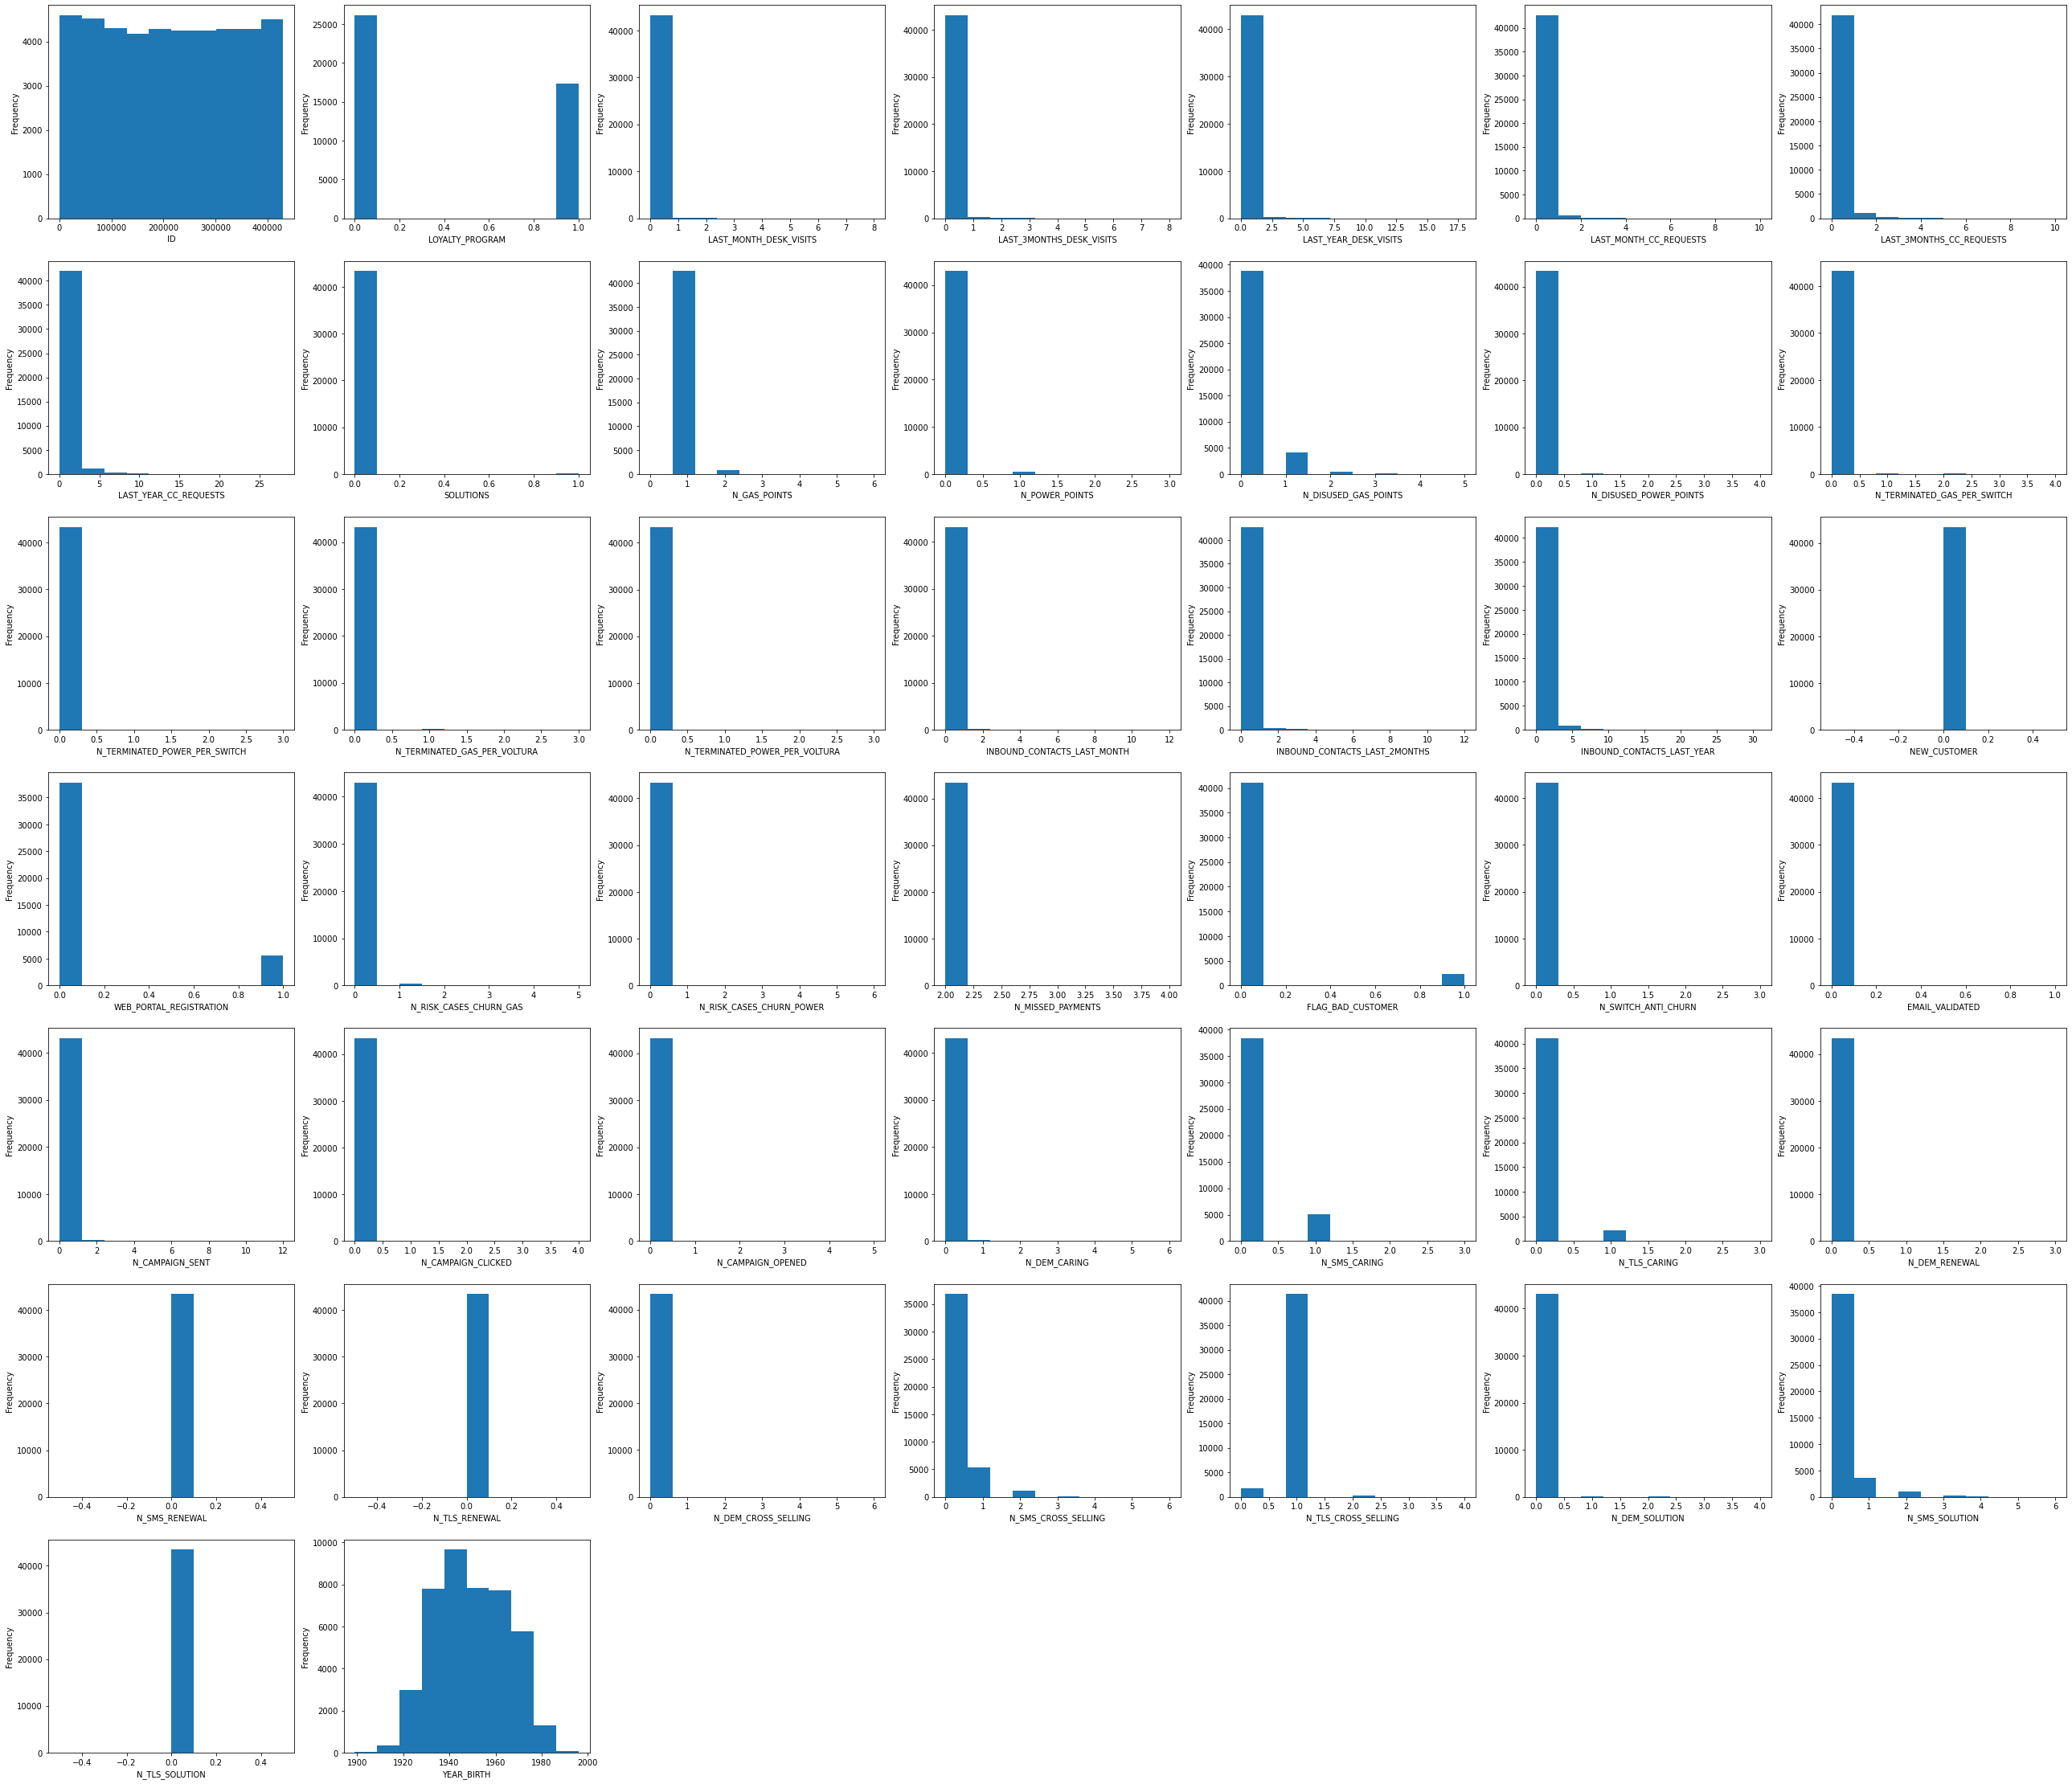

In [5]:
#Plotting the frequency of every numeric column

df1vis= df1u.select_dtypes(['number'],['float64'])

fig= plt.figure(figsize=(45, 40))
i= 0
for column in df1vis:
    sub = fig.add_subplot(7, 7, i+1)
    sub.set_xlabel(column)
    df1vis[column].plot(kind = 'hist')
    i = i+1

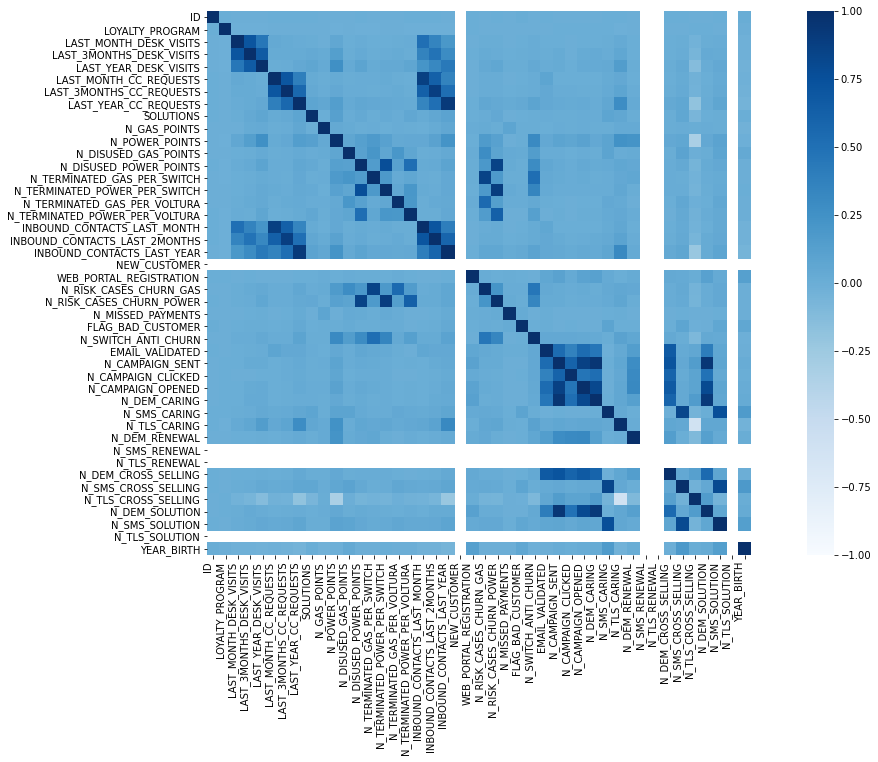

In [6]:
#Plotting the correlation matrix

import seaborn as sn
corr = df1vis.corr()
plt.figure(figsize = (20,10))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=plt.cm.Blues, square=True)
ax=ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

In [20]:
#Creating the dataset for the different types of campaingn 

dftestok= dftest[dftest.PHONE_VALIDATED == 'OK']
dftrainok= dftrain[dftrain.PHONE_VALIDATED == 'OK']
df1e= df1u[df1u.PHONE_VALIDATED == 'KO']
df1em= df1e[df1e.EMAIL_VALIDATED == 1]
df1emc= df1em[df1em.COMMODITY != 'DUAL']

In [41]:
#Selecting the columns needed for the analysis

X_train= dftrainok.iloc[:19999, [3, 5, 6, 8, 9, 12, 25, 28, 29, 42, 43, 44, 59]]
X_test= dftestok.iloc[:, [3, 5, 6, 8, 9, 12, 25, 28, 29, 42, 43, 44, 59]]
y_train= dftrainok.loc[:19999 , 'TLS/SMS']
y_test= dftestok.loc[:, 'TLS/SMS']
X_train.dropna()
y_train.dropna()

0        0.0
1        0.0
2        1.0
4        0.0
5        0.0
        ... 
19992    0.0
19994    0.0
19996    0.0
19997    1.0
19998    0.0
Name: TLS/SMS, Length: 17696, dtype: float64

In [42]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
#Importing svm model
from sklearn import svm

#Creating a svm Classifier
clf1 = svm.SVC(kernel='linear') 

#Training the model using the training sets
clf1.fit(X_train, y_train)

#Predicting the response for test dataset
y_predSVM = clf1.predict(X_test)

In [44]:
np.count_nonzero(y_predSVM == 1)

3226

In [45]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_predKNN = knn.predict(X_test)

In [46]:
np.count_nonzero(y_predKNN == 1)

3204

In [47]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_predRF = clf2.predict(X_test)

In [48]:
np.count_nonzero(y_predRF == 1)

3226

In [49]:
# mport the class
from sklearn.linear_model import LogisticRegression

#Instantiate the model (using the default parameters)
logreg = LogisticRegression()

#Fit the model with data
logreg.fit(X_train,y_train)

#Predict the response for test dataset
y_predLOG = logreg.predict(X_test)

In [50]:
np.count_nonzero(y_predLOG == 1)

3226

In [18]:
#Appending the prediction array to the dataset

dftestok['TLS/SMS'] = y_predSVM.tolist()
df3 = pd.concat([dftrainok, dftestok])
df3dem = df3.copy()
df3dem.set_index('ID', inplace=True, drop=True)

<AxesSubplot:xlabel='TLS/SMS', ylabel='count'>

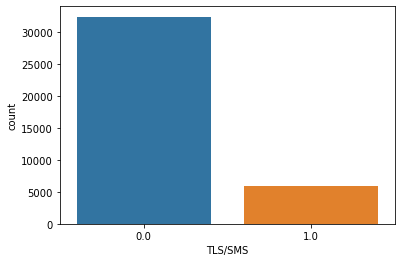

In [19]:
sns.countplot(x= df3['TLS/SMS'])

In [20]:
#Creating the dummies dataset for the contact strategy
#SMS propensity 

column_names = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
testx = pd.DataFrame(columns = column_names)
testx['ID'] = df3['ID'].copy()
testx['TLS/SMS'] = df3['TLS/SMS'].copy()
testx.ID = testx.ID.astype(int)
testx = testx.fillna(0)
testx = testx[['ID',"1","2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", 'TLS/SMS']]
testx.set_index('ID', inplace=True, drop=True)

In [21]:
#Only email validated

column_namesdem = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
testdem = pd.DataFrame(columns = column_namesdem)
testdem['ID'] = df1em['ID'].copy()
testdem['COMMODITY'] = df1em['COMMODITY'].copy()
testdem.ID = testdem.ID.astype(int)
testdem = testdem.fillna(0)
testdem = testdem[['ID',"1","2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", 'COMMODITY']]
testdem.set_index('ID', inplace=True, drop=True)
testdem
testdemcs= testdem.copy()

In [22]:
#Cross-selling

column_names2 = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
test4 = pd.DataFrame(columns = column_names2)
test4['ID'] = df3['ID'].copy()
test4['TLS/SMS'] = df3['TLS/SMS'].copy()
test4['COMMODITY'] = df3['COMMODITY'].copy()
test4.ID = test4.ID.astype(int)
test4 = test4[['ID',"1","2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", 'TLS/SMS', 'COMMODITY']]
test4.set_index('ID', inplace=True, drop=True)
test4 = test4.fillna(0)
test5 = test4.copy()

In [23]:
#Solution SMS

test1 = testx.copy()
test1.loc[test1['TLS/SMS'] == 0, '1'] = 1 
test1.loc[test1['TLS/SMS'] == 1, '1'] = 0

z=1
while z<5:
    for i in test1.index:
        if (test1[str(z)][i] == 0) and (test1['TLS/SMS'][i] == 0):
            (test1[str(z+1)][i])=1
        elif (test1[str(z)][i] == 1) and (test1['TLS/SMS'][i] == 0):
            (test1[str(z+1)][i])=0
    z=z+1

x=7
while x<10:
    for a in test1.index:
        if (test1[str(x)][a] == 0) and (test1['TLS/SMS'][a] == 0):
            (test1[str(x+1)][a])=1
        elif (test1[str(x)][a] == 1) and (test1['TLS/SMS'][a] == 0):
            (test1[str(x+1)][a])=0
    x=x+1
    
y=2
while y<6:
    for b in test1.index:
        if (test1[str(y)][b] == 0) and (test1['TLS/SMS'][b] == 1):
            (test1[str(y+1)][b])=1
        elif (test1[str(y)][b] == 1) and (test1['TLS/SMS'][b] == 1):
            (test1[str(y+1)][b])=0
    y=y+1

w=8
while w<12:
    for c in test1.index:
        if (test1[str(w)][c] == 0) and (test1['TLS/SMS'][c] == 1):
            (test1[str(w+1)][c])=1
        elif (test1[str(w)][c] == 1) and (test1['TLS/SMS'][c] == 1):
            (test1[str(w+1)][c])=0
    w=w+1
    

test1

,1,2,3,4,5,6,7,8,9,10,11,12,TLS/SMS
ID,,,,,,,,,,,,,
22,1,0,1,0,1,0,0,1,0,1,0,0,0.0
26,1,0,1,0,1,0,0,1,0,1,0,0,0.0
32,0,0,1,0,1,0,0,0,1,0,1,0,1.0
40,1,0,1,0,1,0,0,1,0,1,0,0,0.0
42,1,0,1,0,1,0,0,1,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
430274,1,0,1,0,1,0,0,1,0,1,0,0,0.0
430297,1,0,1,0,1,0,0,1,0,1,0,0,0.0
430300,1,0,1,0,1,0,0,1,0,1,0,0,0.0


In [24]:
#Solution TLS

test2 = testx.copy()
test2 = test2.fillna(0)
for i in test2.index:
    if (test2['TLS/SMS'][i] == 0):
        (test2['6'][i])=1
    elif (test2['TLS/SMS'][i] == 1):
        (test2['1'][i])=1  
        (test2['7'][i])=1
test2

,1,2,3,4,5,6,7,8,9,10,11,12,TLS/SMS
ID,,,,,,,,,,,,,
22,0,0,0,0,0,1,0,0,0,0,0,0,0.0
26,0,0,0,0,0,1,0,0,0,0,0,0,0.0
32,1,0,0,0,0,0,1,0,0,0,0,0,1.0
40,0,0,0,0,0,1,0,0,0,0,0,0,0.0
42,0,0,0,0,0,1,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
430274,0,0,0,0,0,1,0,0,0,0,0,0,0.0
430297,0,0,0,0,0,1,0,0,0,0,0,0,0.0
430300,0,0,0,0,0,1,0,0,0,0,0,0,0.0


In [25]:
#Solution DEM

test3 = test1.copy()
test3['EMAIL_VALIDATED'] = df3dem['EMAIL_VALIDATED'].copy()
for i in test3.index:
    if (test3['EMAIL_VALIDATED'][i] == 0):
        (test3.loc[[i], ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]])=0

testdem['1']=1
z=1
while z<12:
    for i in testdem.index:
        if (testdem[str(z)][i] == 0):
            (testdem[str(z+1)][i])=1
    z=z+1

test3 = test3.append(testdem)
test3 = test3.sort_index()        
test3
    

,1,2,3,4,5,6,7,8,9,10,11,12,TLS/SMS,EMAIL_VALIDATED,COMMODITY
ID,,,,,,,,,,,,,,,
22,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN
26,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN
32,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,NaN
40,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN
42,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430274,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN
430297,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN
430300,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN


In [26]:
#Cross Selling SMS

z=1
while z<5:
    for i in test4.index:
        if (test4[str(z)][i] == 0) and (test4['TLS/SMS'][i] == 0) and (test4['COMMODITY'][i] != 'DUAL'):
            (test4[str(z+1)][i])=1
        elif (test4[str(z)][i] == 1) and (test4['TLS/SMS'][i] == 0) and (test4['COMMODITY'][i] != 'DUAL'):
            (test4[str(z+1)][i])=0
    z=z+1

x=6
while x<11:
    for a in test4.index:
        if (test4[str(x)][a] == 0) and (test4['TLS/SMS'][a] == 0) and (test4['COMMODITY'][i] != 'DUAL'):
            (test4[str(x+1)][a])=1
        elif (test4[str(x)][a] == 1) and (test4['TLS/SMS'][a] == 0) and (test4['COMMODITY'][i] != 'DUAL'):
            (test4[str(x+1)][a])=0
    x=x+1
    
y=3
while y<7:
    for b in test4.index:
        if (test4[str(y)][b] == 0) and (test4['TLS/SMS'][b] == 1) and (test4['COMMODITY'][i] != 'DUAL'):
            (test4[str(y+1)][b])=1
        elif (test4[str(y)][b] == 1) and (test4['TLS/SMS'][b] == 1) and (test4['COMMODITY'][i] != 'DUAL'):
            (test4[str(y+1)][b])=0
    y=y+1

w=9
while w<12:
    for c in test4.index:
        if (test4[str(w)][c] == 0) and (test4['TLS/SMS'][c] == 1) and (test4['COMMODITY'][i] != 'DUAL'):
            (test4[str(w+1)][c])=1
        elif (test4[str(w)][c] == 1) and (test4['TLS/SMS'][c] == 1) and (test4['COMMODITY'][i] != 'DUAL'):
            (test4[str(w+1)][c])=0
    w=w+1
    
test4

,1,2,3,4,5,6,7,8,9,10,11,12,TLS/SMS,COMMODITY
ID,,,,,,,,,,,,,,
22,0,1,0,1,0,0,1,0,1,0,1,0,0.0,GAS
26,0,1,0,1,0,0,1,0,1,0,1,0,0.0,GAS
32,0,0,0,1,0,1,0,0,0,1,0,1,1.0,GAS
40,0,1,0,1,0,0,1,0,1,0,1,0,0.0,GAS
42,0,1,0,1,0,0,1,0,1,0,1,0,0.0,GAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430274,0,1,0,1,0,0,1,0,1,0,1,0,0.0,GAS
430297,0,1,0,1,0,0,1,0,1,0,1,0,0.0,GAS
430300,0,1,0,1,0,0,1,0,1,0,1,0,0.0,GAS


In [27]:
#Cross Selling TLS

for i in test5.index:
    if (test5['TLS/SMS'][i] == 0) and (test5['COMMODITY'][i] != 'DUAL'):
        (test5['12'][i])=1
    elif (test5['TLS/SMS'][i] == 1) and (test5['COMMODITY'][i] != 'DUAL'):
        (test5['2'][i])=1  
        (test5['8'][i])=1
        
test5

,1,2,3,4,5,6,7,8,9,10,11,12,TLS/SMS,COMMODITY
ID,,,,,,,,,,,,,,
22,0,0,0,0,0,0,0,0,0,0,0,1,0.0,GAS
26,0,0,0,0,0,0,0,0,0,0,0,1,0.0,GAS
32,0,1,0,0,0,0,0,1,0,0,0,0,1.0,GAS
40,0,0,0,0,0,0,0,0,0,0,0,1,0.0,GAS
42,0,0,0,0,0,0,0,0,0,0,0,1,0.0,GAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430274,0,0,0,0,0,0,0,0,0,0,0,1,0.0,GAS
430297,0,0,0,0,0,0,0,0,0,0,0,1,0.0,GAS
430300,0,0,0,0,0,0,0,0,0,0,0,1,0.0,GAS


In [28]:
#Cross Selling DEM

test6 = test4.copy()
test6['EMAIL_VALIDATED'] = df3dem['EMAIL_VALIDATED'].copy()
for i in test6.index:
    if (test6['EMAIL_VALIDATED'][i] == 0):
        (test6.loc[[i], ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]])=0
        

z=1
while z<12:
    for i in testdemcs.index:
        if (testdemcs[str(z)][i] == 0) and (testdemcs['COMMODITY'][i] != 'DUAL'):
            (testdemcs[str(z+1)][i])=1
    z=z+1

test6 = test6.append(testdemcs)
test6 = test6.sort_index()        
test6

,1,2,3,4,5,6,7,8,9,10,11,12,TLS/SMS,COMMODITY,EMAIL_VALIDATED
ID,,,,,,,,,,,,,,,
22,0,0,0,0,0,0,0,0,0,0,0,0,0.0,GAS,0.0
26,0,0,0,0,0,0,0,0,0,0,0,0,0.0,GAS,0.0
32,0,0,0,0,0,0,0,0,0,0,0,0,1.0,GAS,0.0
40,0,0,0,0,0,0,0,0,0,0,0,0,0.0,GAS,0.0
42,0,0,0,0,0,0,0,0,0,0,0,0,0.0,GAS,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430274,0,0,0,0,0,0,0,0,0,0,0,0,0.0,GAS,0.0
430297,0,0,0,0,0,0,0,0,0,0,0,0,0.0,GAS,0.0
430300,0,0,0,0,0,0,0,0,0,0,0,0,0.0,GAS,0.0


In [29]:
#Renaming the datasets in the proper way

Solution_SMS= test1.copy()
Solution_TLS= test2.copy()
Solution_DEM= test3.copy()
Cross_Selling_SMS= test4.copy()
Cross_Selling_TLS= test5.copy()
Cross_Selling_DEM= test6.copy()

In [30]:
#Dropping of all the non-useful columns

Solution_SMS= Solution_SMS.drop(['TLS/SMS'], axis=1)
Solution_TLS= Solution_TLS.drop(['TLS/SMS'], axis=1)
Solution_DEM= Solution_DEM.drop(['TLS/SMS', 'EMAIL_VALIDATED'], axis=1)
Cross_Selling_SMS= Cross_Selling_SMS.drop(['TLS/SMS', 'COMMODITY'], axis=1) 
Cross_Selling_TLS= Cross_Selling_TLS.drop(['TLS/SMS', 'COMMODITY'], axis=1)
Cross_Selling_DEM= Cross_Selling_DEM.drop(['TLS/SMS', 'COMMODITY', 'EMAIL_VALIDATED'], axis=1)

In [31]:
#Saving the datasets as .csv 

Solution_SMS.to_csv('Solution_SMS.csv')
Solution_TLS.to_csv('Solution_TLS.csv')
Solution_DEM.to_csv('Solution_DEM.csv')
Cross_Selling_SMS.to_csv('Cross_Selling_SMS.csv')
Cross_Selling_TLS.to_csv('Cross_Selling_TLS.csv')
Cross_Selling_DEM.to_csv('Cross_Selling_DEM.csv')